In [7]:
import xarray as xr
import geopandas as gpd
import pandas as pd
import numpy as np
import shapely.geometry
import shapely
import rasterio
import rioxarray
from rasterio.features import shapes
from shapely.geometry import shape
import matplotlib.pyplot as plt
from pathlib import Path

In [8]:
xr_final_SI = xr.open_dataset('Output\\xr_SI_Landcover_beforefeedstock.nc')

df_landuse_suitability_index = xr_final_SI.to_dataframe()
df_landuse_suitability_index.reset_index(inplace=True)
df_landuse_suitability_index = gpd.GeoDataFrame(df_landuse_suitability_index, geometry =gpd.points_from_xy(df_landuse_suitability_index['lon'],df_landuse_suitability_index['lat']))
df_landuse_suitability_index.crs = {'init': 'epsg:4326'}

## Acquire polygon containing boudary of Thailand
world_filepath = gpd.datasets.get_path('naturalearth_lowres')
world = gpd.read_file(world_filepath)
th = world.loc[world['name'] == 'Thailand'] # get Thailand row
boundaries = th['geometry'] # get Thailand geometry
boundaries.crs = {'init': 'epsg:4326'}
boundaries = boundaries.geometry.unary_union

df_landuse_suitability_index['lccs_class'].loc[~df_landuse_suitability_index.within(boundaries)] = 0

print(df_landuse_suitability_index)

C:\Users\basna\AppData\Roaming\Python\Python311\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\basna\AppData\Local\Temp\ipykernel_19316\933181435.py:9: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_filepath = gpd.datasets.get_path('naturalearth_lowres')
C:\Users\basna\AppData\Roaming\Python\Python311\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mind

                lat         lon  lccs_class  SI_BGEC  SI_Biomass  SI_Solar  \
0          5.615278   97.345833           0        0           0         0   
1          5.615278   97.348611           0        0           0         0   
2          5.615278   97.351389           0        0           0         0   
3          5.615278   97.354167           0        0           0         0   
4          5.615278   97.356944           0        0           0         0   
...             ...         ...         ...      ...         ...       ...   
15957805  20.462500  105.623611           0        0           0         0   
15957806  20.462500  105.626389           0        0           0         0   
15957807  20.462500  105.629167           0        0           0         0   
15957808  20.462500  105.631944           0        0           0         0   
15957809  20.462500  105.634722           0        0           0         0   

          SI_Wind  SI_BGWW  SI_MSW  SI_IEW                    g

C:\Users\basna\AppData\Local\Temp\ipykernel_19316\933181435.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index['lccs_class'].loc[~df_landuse_suitability_index.within(boundaries)] = 0


In [9]:
## First, I try to create a bouadary of THialand for acquiring data##
thailandmap = gpd.read_file('Data\\tha_admbnda_adm1_rtsd_20220121\\tha_admbnda_adm1_rtsd_20220121.shp')
thailandmap.crs = {'init': 'epsg:4326'}
thailandmap['center'] = thailandmap['geometry'].centroid
thailandmap = thailandmap.drop(columns = 'geometry')
thailandmap = thailandmap.set_geometry('center')
thailandmap.crs = {'init': 'epsg:4326'}
print(thailandmap)

    Shape_Leng  Shape_Area                   ADM1_EN          ADM1_TH  \
0     2.417227    0.131339                   Bangkok    กรุงเทพมหานคร   
1     1.695100    0.079262              Samut Prakan      สมุทรปราการ   
2     1.251111    0.053238                Nonthaburi          นนทบุรี   
3     1.884945    0.126983              Pathum Thani         ปทุมธานี   
4     3.041716    0.213938  Phra Nakhon Si Ayutthaya  พระนครศรีอยุธยา   
..         ...         ...                       ...              ...   
72    5.192570    0.385879                     Trang             ตรัง   
73    3.257829    0.316268               Phatthalung           พัทลุง   
74    2.820830    0.160825                   Pattani          ปัตตานี   
75    4.839230    0.365448                      Yala             ยะลา   
76    3.456840    0.366648                Narathiwat         นราธิวาส   

   ADM1_PCODE  ADM1_REF  ADM1ALT1EN  ADM1ALT2EN  ADM1ALT1TH  ADM1ALT2TH  \
0        TH10       NaN         NaN         NaN 

C:\Users\basna\AppData\Roaming\Python\Python311\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\basna\AppData\Local\Temp\ipykernel_19316\2495709284.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  thailandmap['center'] = thailandmap['geometry'].centroid
C:\Users\basna\AppData\Roaming\Python\Python311\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pypr

In [10]:
df_landuse_suitability_index_2 = gpd.sjoin_nearest(df_landuse_suitability_index,thailandmap,how='left')
print('columns before drop = ',df_landuse_suitability_index_2.columns)

for i in df_landuse_suitability_index_2.columns:
    if i not in (['lat', 'lon', 'lccs_class','SI_Solar','SI_Wind', 'SI_BGEC', 'SI_Biomass', 'SI_BGWW',
       'SI_MSW', 'SI_IEW', 'ADM1_EN', 'ADM1_TH']):
        df_landuse_suitability_index_2 = df_landuse_suitability_index_2.drop(columns=i)

print('columns after drop = ',df_landuse_suitability_index_2.columns)
print(len(df_landuse_suitability_index_2))
print(df_landuse_suitability_index_2)

C:\Users\basna\AppData\Roaming\Python\Python311\site-packages\geopandas\array.py:364: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


columns before drop =  Index(['lat', 'lon', 'lccs_class', 'SI_BGEC', 'SI_Biomass', 'SI_Solar',
       'SI_Wind', 'SI_BGWW', 'SI_MSW', 'SI_IEW', 'geometry', 'index_right',
       'Shape_Leng', 'Shape_Area', 'ADM1_EN', 'ADM1_TH', 'ADM1_PCODE',
       'ADM1_REF', 'ADM1ALT1EN', 'ADM1ALT2EN', 'ADM1ALT1TH', 'ADM1ALT2TH',
       'ADM0_EN', 'ADM0_TH', 'ADM0_PCODE', 'date', 'validOn', 'validTo'],
      dtype='object')
columns after drop =  Index(['lat', 'lon', 'lccs_class', 'SI_BGEC', 'SI_Biomass', 'SI_Solar',
       'SI_Wind', 'SI_BGWW', 'SI_MSW', 'SI_IEW', 'ADM1_EN', 'ADM1_TH'],
      dtype='object')
15957810
                lat         lon  lccs_class  SI_BGEC  SI_Biomass  SI_Solar  \
0          5.615278   97.345833           0        0           0         0   
1          5.615278   97.348611           0        0           0         0   
2          5.615278   97.351389           0        0           0         0   
3          5.615278   97.354167           0        0           0         0   


In [11]:
print('no of province = ',len(df_landuse_suitability_index_2['ADM1_TH'].unique()))

no of province =  77


In [12]:
lccs_resolution = 300 ## meters

## Agriculture ###
df_landuse_suitability_index_2['A_BGEC'] = 0
df_landuse_suitability_index_2['A_BGEC'].loc[df_landuse_suitability_index_2['lccs_class'].isin([10,11,12,20,30,40])] = 1
df_landuse_suitability_index_2['A_BGEC']= df_landuse_suitability_index_2['A_BGEC'].astype('float64')

## Shrubs and Grassland ## Short vegetation and agriculture ## Natural Reserve
df_landuse_suitability_index_2['A_Biomass'] = 0
df_landuse_suitability_index_2['A_Biomass'].loc[df_landuse_suitability_index_2['lccs_class'].isin([110,130,120,121,122,200,201,202,140,150,151,152,153,10,11,12,20,30,40,180])] = 1
df_landuse_suitability_index_2['A_Biomass']= df_landuse_suitability_index_2['A_Biomass'].astype('float64')

df_landuse_suitability_index_2['A_BGWW'] = 0
df_landuse_suitability_index_2['A_BGWW'].loc[df_landuse_suitability_index_2['lccs_class'].isin([[10,11,12,20,30,40]])] = 1
df_landuse_suitability_index_2['A_BGWW']= df_landuse_suitability_index_2['A_BGWW'].astype('float64')

df_landuse_suitability_index_2['A_MSW'] = 0
df_landuse_suitability_index_2['A_MSW'].loc[df_landuse_suitability_index_2['lccs_class'].isin([190])] = 1
df_landuse_suitability_index_2['A_MSW']= df_landuse_suitability_index_2['A_MSW'].astype('float64')

df_landuse_suitability_index_2['A_IEW'] = 0
df_landuse_suitability_index_2['A_IEW'].loc[df_landuse_suitability_index_2['lccs_class'].isin([190])] = 1
df_landuse_suitability_index_2['A_IEW']= df_landuse_suitability_index_2['A_IEW'].astype('float64')

print(df_landuse_suitability_index_2)

feedstock = pd.read_excel('Data\\สรุปข้อมูลพลังงาน -  ฐานข้อมูลพลังงานประเทศไทย.xlsx',sheet_name='สรุปข้อมูลพลังงาน -  ฐานข้อมูลพ')
feedstock = feedstock.loc[feedstock['แหล่งพลังงานหลัก'].isin(['ชีวมวล','ก๊าซชีวภาพ','ขยะ'])]
feedstock.reset_index(inplace=True,drop=True)
print(feedstock)
print(len(feedstock['จังหวัด'].unique()))

list_province = df_landuse_suitability_index_2['ADM1_TH'].unique()
list_fueltype = feedstock['แหล่งพลังงานหลัก'].unique()
print(list_province)
print(list_fueltype)


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\1621553096.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_BGEC'].loc[df_landuse_suitability_index_2['lccs_class'].isin([10,11,12,20,30,40])] = 1
C:\Users\basna\AppData\Local\Temp\ipykernel_19316\1621553096.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_Biomass'].loc[df_landuse_suitability_index_2['lccs_class'].isin([110,130,120,121,122,200,201,202,140,150,151,152,153,10,11,12,20,30,40,180])] = 1
C:\Users\basna\AppData\Local\Temp\ipykernel_19316\1621553096.py:14: SettingWithCopyWarning: 
A val

                lat         lon  lccs_class  SI_BGEC  SI_Biomass  SI_Solar  \
0          5.615278   97.345833           0        0           0         0   
1          5.615278   97.348611           0        0           0         0   
2          5.615278   97.351389           0        0           0         0   
3          5.615278   97.354167           0        0           0         0   
4          5.615278   97.356944           0        0           0         0   
...             ...         ...         ...      ...         ...       ...   
15957805  20.462500  105.623611           0        0           0         0   
15957806  20.462500  105.626389           0        0           0         0   
15957807  20.462500  105.629167           0        0           0         0   
15957808  20.462500  105.631944           0        0           0         0   
15957809  20.462500  105.634722           0        0           0         0   

          SI_Wind  SI_BGWW  SI_MSW  SI_IEW    ADM1_EN ADM1_TH  

In [13]:
## BGEC ###
for i in list_province:
    totalareaprovince = df_landuse_suitability_index_2['A_BGEC'].loc[(df_landuse_suitability_index_2['A_BGEC'] > 0) &(df_landuse_suitability_index_2['ADM1_TH'] == i)].sum()
    feedstockpergrid = (feedstock['ศักยภาพพลังงานทดแทน (ktoe)'].loc[(feedstock['จังหวัด'] == i) & (feedstock['แหล่งพลังงานหลัก'] == 'ก๊าซชีวภาพ')].values[0]) / totalareaprovince
    df_landuse_suitability_index_2['A_BGEC'].loc[(df_landuse_suitability_index_2['A_BGEC'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid
    print(i, totalareaprovince, feedstockpergrid)

print("total bgec = ", df_landuse_suitability_index_2['A_BGEC'].sum())

C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3107014047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_BGEC'].loc[(df_landuse_suitability_index_2['A_BGEC'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


ภูเก็ต 4669.0 0.00012636538873420433


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3107014047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_BGEC'].loc[(df_landuse_suitability_index_2['A_BGEC'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


สตูล 19581.0 0.0004514580460650631


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3107014047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_BGEC'].loc[(df_landuse_suitability_index_2['A_BGEC'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


ยะลา 16491.0 9.217148747801832e-05


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3107014047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_BGEC'].loc[(df_landuse_suitability_index_2['A_BGEC'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


นราธิวาส 23705.0 0.00019616114743724954


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3107014047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_BGEC'].loc[(df_landuse_suitability_index_2['A_BGEC'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


สงขลา 48829.0 0.00039996723258719206


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3107014047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_BGEC'].loc[(df_landuse_suitability_index_2['A_BGEC'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


ปัตตานี 28005.0 0.00015140153544009998


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3107014047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_BGEC'].loc[(df_landuse_suitability_index_2['A_BGEC'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


ตรัง 38007.0 0.0006043623543031546


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3107014047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_BGEC'].loc[(df_landuse_suitability_index_2['A_BGEC'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


พัทลุง 39919.0 0.0003514617099626744


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3107014047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_BGEC'].loc[(df_landuse_suitability_index_2['A_BGEC'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


กระบี่ 46753.0 0.001655936517442731


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3107014047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_BGEC'].loc[(df_landuse_suitability_index_2['A_BGEC'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


นครศรีธรรมราช 65863.0 0.0004144967584227867


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3107014047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_BGEC'].loc[(df_landuse_suitability_index_2['A_BGEC'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


พังงา 23444.0 0.0003855997270090428


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3107014047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_BGEC'].loc[(df_landuse_suitability_index_2['A_BGEC'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


สุราษฎร์ธานี 72160.0 0.0005921563192904656


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3107014047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_BGEC'].loc[(df_landuse_suitability_index_2['A_BGEC'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


ตราด 10963.0 0.0005773966979841285


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3107014047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_BGEC'].loc[(df_landuse_suitability_index_2['A_BGEC'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


ระนอง 24787.0 0.0004425707023843144


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3107014047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_BGEC'].loc[(df_landuse_suitability_index_2['A_BGEC'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


ชุมพร 48190.0 0.0015833160406723385


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3107014047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_BGEC'].loc[(df_landuse_suitability_index_2['A_BGEC'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


ประจวบคีรีขันธ์ 33585.0 0.0009456602649992557


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3107014047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_BGEC'].loc[(df_landuse_suitability_index_2['A_BGEC'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


ระยอง 35442.0 0.0006133965351842447


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3107014047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_BGEC'].loc[(df_landuse_suitability_index_2['A_BGEC'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


ศรีสะเกษ 88048.0 0.0003364074141377431


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3107014047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_BGEC'].loc[(df_landuse_suitability_index_2['A_BGEC'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


จันทบุรี 41820.0 0.0013926351028216166


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3107014047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_BGEC'].loc[(df_landuse_suitability_index_2['A_BGEC'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


เพชรบุรี 32663.0 0.00019716498790680586


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3107014047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_BGEC'].loc[(df_landuse_suitability_index_2['A_BGEC'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


ชลบุรี 30505.0 0.001582035731847238


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3107014047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_BGEC'].loc[(df_landuse_suitability_index_2['A_BGEC'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


สมุทรสงคราม 13361.0 2.9937878901279845e-06


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3107014047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_BGEC'].loc[(df_landuse_suitability_index_2['A_BGEC'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


สมุทรปราการ 9564.0 2.4048515265579255e-05


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3107014047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_BGEC'].loc[(df_landuse_suitability_index_2['A_BGEC'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


สมุทรสาคร 6866.0 2.4759685406350133e-05


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3107014047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_BGEC'].loc[(df_landuse_suitability_index_2['A_BGEC'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


อุบลราชธานี 103099.0 0.000487783586649725


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3107014047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_BGEC'].loc[(df_landuse_suitability_index_2['A_BGEC'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


กาญจนบุรี 39025.0 0.0014608584240871235


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3107014047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_BGEC'].loc[(df_landuse_suitability_index_2['A_BGEC'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


ราชบุรี 50559.0 0.0008346684072074211


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3107014047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_BGEC'].loc[(df_landuse_suitability_index_2['A_BGEC'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


สระแก้ว 58851.0 0.0008181679155834225


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3107014047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_BGEC'].loc[(df_landuse_suitability_index_2['A_BGEC'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


สุรินทร์ 89913.0 0.00027137343876858737


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3107014047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_BGEC'].loc[(df_landuse_suitability_index_2['A_BGEC'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


ฉะเชิงเทรา 42550.0 0.0011365452408930669


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3107014047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_BGEC'].loc[(df_landuse_suitability_index_2['A_BGEC'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


กรุงเทพมหานคร 3929.0 0.00030542122677526084


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3107014047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_BGEC'].loc[(df_landuse_suitability_index_2['A_BGEC'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


ปราจีนบุรี 38302.0 0.0006876925486919743


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3107014047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_BGEC'].loc[(df_landuse_suitability_index_2['A_BGEC'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


นครปฐม 35982.0 0.0004274359401923184


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3107014047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_BGEC'].loc[(df_landuse_suitability_index_2['A_BGEC'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


นนทบุรี 10593.0 4.531294250920419e-05


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3107014047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_BGEC'].loc[(df_landuse_suitability_index_2['A_BGEC'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


นครนายก 24212.0 0.00016727242689575417


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3107014047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_BGEC'].loc[(df_landuse_suitability_index_2['A_BGEC'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


บุรีรัมย์ 111255.0 1.743741854298683e-05


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3107014047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_BGEC'].loc[(df_landuse_suitability_index_2['A_BGEC'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


ปทุมธานี 16747.0 0.0003869349734280767


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3107014047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_BGEC'].loc[(df_landuse_suitability_index_2['A_BGEC'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


สุพรรณบุรี 55441.0 0.0007694666402121174


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3107014047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_BGEC'].loc[(df_landuse_suitability_index_2['A_BGEC'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


พระนครศรีอยุธยา 22355.0 7.962424513531649e-05


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3107014047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_BGEC'].loc[(df_landuse_suitability_index_2['A_BGEC'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


อ่างทอง 21888.0 5.071271929824562e-05


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3107014047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_BGEC'].loc[(df_landuse_suitability_index_2['A_BGEC'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


สระบุรี 37018.0 0.001147279701766708


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3107014047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_BGEC'].loc[(df_landuse_suitability_index_2['A_BGEC'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


นครราชสีมา 124145.0 0.0026812195416649888


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3107014047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_BGEC'].loc[(df_landuse_suitability_index_2['A_BGEC'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


สิงห์บุรี 28905.0 1.5568240788790867e-05


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3107014047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_BGEC'].loc[(df_landuse_suitability_index_2['A_BGEC'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


ลพบุรี 80434.0 0.0004566476863018126


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3107014047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_BGEC'].loc[(df_landuse_suitability_index_2['A_BGEC'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


ชัยนาท 35459.0 0.00012859922727657293


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3107014047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_BGEC'].loc[(df_landuse_suitability_index_2['A_BGEC'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


อุทัยธานี 40094.0 0.000408789345039158


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3107014047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_BGEC'].loc[(df_landuse_suitability_index_2['A_BGEC'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


นครสวรรค์ 63372.0 0.00022296913463359214


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3107014047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_BGEC'].loc[(df_landuse_suitability_index_2['A_BGEC'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


ร้อยเอ็ด 66275.0 0.0003895888344021124


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3107014047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_BGEC'].loc[(df_landuse_suitability_index_2['A_BGEC'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


อำนาจเจริญ 60508.0 0.00028657367620810474


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3107014047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_BGEC'].loc[(df_landuse_suitability_index_2['A_BGEC'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


ยโสธร 51084.0 0.0001740270926317438


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3107014047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_BGEC'].loc[(df_landuse_suitability_index_2['A_BGEC'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


มหาสารคาม 94960.0 0.0001803917438921651


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3107014047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_BGEC'].loc[(df_landuse_suitability_index_2['A_BGEC'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


ชัยภูมิ 96668.0 0.0007223693466297017


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3107014047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_BGEC'].loc[(df_landuse_suitability_index_2['A_BGEC'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


ตาก 36285.0 0.000420008267879289


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3107014047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_BGEC'].loc[(df_landuse_suitability_index_2['A_BGEC'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


เพชรบูรณ์ 65053.0 0.0001650961523680691


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3107014047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_BGEC'].loc[(df_landuse_suitability_index_2['A_BGEC'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


ขอนแก่น 88390.0 0.0006300486480371083


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3107014047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_BGEC'].loc[(df_landuse_suitability_index_2['A_BGEC'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


พิจิตร 72046.0 1.984843016961386e-05


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3107014047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_BGEC'].loc[(df_landuse_suitability_index_2['A_BGEC'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


กำแพงเพชร 75749.0 0.0008843681104701051


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3107014047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_BGEC'].loc[(df_landuse_suitability_index_2['A_BGEC'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


มุกดาหาร 49570.0 0.00025983457736534197


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3107014047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_BGEC'].loc[(df_landuse_suitability_index_2['A_BGEC'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


กาฬสินธุ์ 77428.0 0.0010243064524461435


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3107014047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_BGEC'].loc[(df_landuse_suitability_index_2['A_BGEC'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


พิษณุโลก 60291.0 5.622729760660795e-05


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3107014047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_BGEC'].loc[(df_landuse_suitability_index_2['A_BGEC'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


หนองบัวลำภู 74335.0 2.7846909262124165e-05


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3107014047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_BGEC'].loc[(df_landuse_suitability_index_2['A_BGEC'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


เลย 83197.0 7.404113129079173e-05


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3107014047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_BGEC'].loc[(df_landuse_suitability_index_2['A_BGEC'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


สุโขทัย 77748.0 3.974378762154653e-05


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3107014047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_BGEC'].loc[(df_landuse_suitability_index_2['A_BGEC'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


อุดรธานี 70765.0 0.0005473044584187098


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3107014047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_BGEC'].loc[(df_landuse_suitability_index_2['A_BGEC'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


สกลนคร 65691.0 0.00035971442054467126


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3107014047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_BGEC'].loc[(df_landuse_suitability_index_2['A_BGEC'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


นครพนม 51562.0 0.0001070555835692952


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3107014047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_BGEC'].loc[(df_landuse_suitability_index_2['A_BGEC'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


อุตรดิตถ์ 31400.0 0.00020605095541401274


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3107014047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_BGEC'].loc[(df_landuse_suitability_index_2['A_BGEC'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


แม่ฮ่องสอน 12589.0 0.0002613392644372071


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3107014047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_BGEC'].loc[(df_landuse_suitability_index_2['A_BGEC'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


ลำพูน 41694.0 0.0001045714011608385


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3107014047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_BGEC'].loc[(df_landuse_suitability_index_2['A_BGEC'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


หนองคาย 43132.0 8.276917369934155e-05


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3107014047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_BGEC'].loc[(df_landuse_suitability_index_2['A_BGEC'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


แพร่ 21948.0 6.83433570256971e-05


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3107014047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_BGEC'].loc[(df_landuse_suitability_index_2['A_BGEC'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


บึงกาฬ 51102.0 0.000409768697898321


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3107014047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_BGEC'].loc[(df_landuse_suitability_index_2['A_BGEC'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


ลำปาง 28507.0 0.00018346371066755535


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3107014047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_BGEC'].loc[(df_landuse_suitability_index_2['A_BGEC'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


น่าน 36486.0 5.8378556158526556e-05


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3107014047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_BGEC'].loc[(df_landuse_suitability_index_2['A_BGEC'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


เชียงใหม่ 39014.0 0.00040011278002768236


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3107014047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_BGEC'].loc[(df_landuse_suitability_index_2['A_BGEC'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


พะเยา 45058.0 3.0405255448533004e-05
เชียงราย 77305.0 4.010089903628485e-05
total bgec =  1873.8300000000015


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3107014047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_BGEC'].loc[(df_landuse_suitability_index_2['A_BGEC'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


In [14]:
## Biomass ###
for i in list_province:
    totalareaprovince = df_landuse_suitability_index_2['A_Biomass'].loc[(df_landuse_suitability_index_2['A_Biomass'] > 0) &(df_landuse_suitability_index_2['ADM1_TH'] == i)].sum()
    feedstockpergrid = (feedstock['ศักยภาพพลังงานทดแทน (ktoe)'].loc[(feedstock['จังหวัด'] == i) & (feedstock['แหล่งพลังงานหลัก'] == 'ชีวมวล')].values[0]) / totalareaprovince
    df_landuse_suitability_index_2['A_Biomass'].loc[(df_landuse_suitability_index_2['A_Biomass'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid
    print(i,(feedstock['ศักยภาพพลังงานทดแทน (ktoe)'].loc[(feedstock['จังหวัด'] == i) & (feedstock['แหล่งพลังงานหลัก'] == 'ชีวมวล')].values[0]), totalareaprovince, feedstockpergrid)

print("total Biomass = ", df_landuse_suitability_index_2['A_Biomass'].sum())

C:\Users\basna\AppData\Local\Temp\ipykernel_19316\1662189027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_Biomass'].loc[(df_landuse_suitability_index_2['A_Biomass'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


ภูเก็ต 7.46 4697.0 0.0015882478177560145


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\1662189027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_Biomass'].loc[(df_landuse_suitability_index_2['A_Biomass'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


สตูล 144.36 19622.0 0.007357048211191521


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\1662189027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_Biomass'].loc[(df_landuse_suitability_index_2['A_Biomass'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


ยะลา 91.6 16492.0 0.005554208100897405


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\1662189027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_Biomass'].loc[(df_landuse_suitability_index_2['A_Biomass'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


นราธิวาส 136.77 24052.0 0.0056864294029602535


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\1662189027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_Biomass'].loc[(df_landuse_suitability_index_2['A_Biomass'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


สงขลา 265.72 49099.0 0.005411922849752541


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\1662189027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_Biomass'].loc[(df_landuse_suitability_index_2['A_Biomass'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


ปัตตานี 83.78 28225.0 0.0029682905225863598


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\1662189027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_Biomass'].loc[(df_landuse_suitability_index_2['A_Biomass'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


ตรัง 363.89 38011.0 0.00957328141853674


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\1662189027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_Biomass'].loc[(df_landuse_suitability_index_2['A_Biomass'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


พัทลุง 190.69 40917.0 0.004660410098492069


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\1662189027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_Biomass'].loc[(df_landuse_suitability_index_2['A_Biomass'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


กระบี่ 1245.47 46761.0 0.02663480250636214


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\1662189027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_Biomass'].loc[(df_landuse_suitability_index_2['A_Biomass'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


นครศรีธรรมราช 883.0 66787.0 0.013221135849791127


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\1662189027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_Biomass'].loc[(df_landuse_suitability_index_2['A_Biomass'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


พังงา 294.37 23588.0 0.012479650669832119


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\1662189027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_Biomass'].loc[(df_landuse_suitability_index_2['A_Biomass'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


สุราษฎร์ธานี 1601.5 72186.0 0.02218574238772061


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\1662189027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_Biomass'].loc[(df_landuse_suitability_index_2['A_Biomass'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


ตราด 87.52 11326.0 0.0077273529931131905


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\1662189027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_Biomass'].loc[(df_landuse_suitability_index_2['A_Biomass'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


ระนอง 174.89 24809.0 0.0070494578580353896


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\1662189027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_Biomass'].loc[(df_landuse_suitability_index_2['A_Biomass'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


ชุมพร 1099.52 49976.0 0.02200096046102129


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\1662189027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_Biomass'].loc[(df_landuse_suitability_index_2['A_Biomass'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


ประจวบคีรีขันธ์ 465.23 37479.0 0.01241308466074335


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\1662189027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_Biomass'].loc[(df_landuse_suitability_index_2['A_Biomass'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


ระยอง 108.07 36344.0 0.002973530706581554


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\1662189027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_Biomass'].loc[(df_landuse_suitability_index_2['A_Biomass'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


ศรีสะเกษ 909.29 89227.0 0.010190749436829658


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\1662189027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_Biomass'].loc[(df_landuse_suitability_index_2['A_Biomass'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


จันทบุรี 59.96 44087.0 0.0013600381064712954


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\1662189027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_Biomass'].loc[(df_landuse_suitability_index_2['A_Biomass'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


เพชรบุรี 191.54 36413.0 0.0052602092659215114


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\1662189027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_Biomass'].loc[(df_landuse_suitability_index_2['A_Biomass'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


ชลบุรี 333.79 30665.0 0.010885048100440243


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\1662189027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_Biomass'].loc[(df_landuse_suitability_index_2['A_Biomass'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


สมุทรสงคราม 22.53 13571.0 0.001660157689190185


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\1662189027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_Biomass'].loc[(df_landuse_suitability_index_2['A_Biomass'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


สมุทรปราการ 11.87 10924.0 0.0010865983156352983


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\1662189027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_Biomass'].loc[(df_landuse_suitability_index_2['A_Biomass'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


สมุทรสาคร 2.99 7450.0 0.00040134228187919464


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\1662189027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_Biomass'].loc[(df_landuse_suitability_index_2['A_Biomass'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


อุบลราชธานี 295.1 104527.0 0.0028231940072899826


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\1662189027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_Biomass'].loc[(df_landuse_suitability_index_2['A_Biomass'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


กาญจนบุรี 956.01 59602.0 0.016039897990000336


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\1662189027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_Biomass'].loc[(df_landuse_suitability_index_2['A_Biomass'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


ราชบุรี 291.11 55035.0 0.005289543018079404


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\1662189027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_Biomass'].loc[(df_landuse_suitability_index_2['A_Biomass'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


สระแก้ว 625.99 62371.0 0.010036555450449729


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\1662189027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_Biomass'].loc[(df_landuse_suitability_index_2['A_Biomass'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


สุรินทร์ 593.58 90818.0 0.006535929000858861


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\1662189027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_Biomass'].loc[(df_landuse_suitability_index_2['A_Biomass'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


ฉะเชิงเทรา 401.97 43986.0 0.009138589551220844


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\1662189027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_Biomass'].loc[(df_landuse_suitability_index_2['A_Biomass'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


กรุงเทพมหานคร 49.13 3956.0 0.012419110212335693


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\1662189027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_Biomass'].loc[(df_landuse_suitability_index_2['A_Biomass'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


ปราจีนบุรี 199.32 41539.0 0.004798382243193144


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\1662189027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_Biomass'].loc[(df_landuse_suitability_index_2['A_Biomass'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


นครปฐม 245.19 36417.0 0.006732844550621962


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\1662189027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_Biomass'].loc[(df_landuse_suitability_index_2['A_Biomass'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


นนทบุรี 54.46 10610.0 0.005132893496701226


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\1662189027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_Biomass'].loc[(df_landuse_suitability_index_2['A_Biomass'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


นครนายก 144.39 26908.0 0.005366062137654229


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\1662189027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_Biomass'].loc[(df_landuse_suitability_index_2['A_Biomass'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


บุรีรัมย์ 731.48 112568.0 0.006498116693909459


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\1662189027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_Biomass'].loc[(df_landuse_suitability_index_2['A_Biomass'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


ปทุมธานี 181.01 16810.0 0.010767995240928018


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\1662189027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_Biomass'].loc[(df_landuse_suitability_index_2['A_Biomass'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


สุพรรณบุรี 1092.94 56079.0 0.019489291891795504


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\1662189027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_Biomass'].loc[(df_landuse_suitability_index_2['A_Biomass'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


พระนครศรีอยุธยา 419.17 22446.0 0.018674596810122072


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\1662189027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_Biomass'].loc[(df_landuse_suitability_index_2['A_Biomass'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


อ่างทอง 134.19 21947.0 0.006114275299585365


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\1662189027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_Biomass'].loc[(df_landuse_suitability_index_2['A_Biomass'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


สระบุรี 268.81 37918.0 0.007089245213355135


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\1662189027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_Biomass'].loc[(df_landuse_suitability_index_2['A_Biomass'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


นครราชสีมา 1734.57 127849.0 0.013567333338547817


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\1662189027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_Biomass'].loc[(df_landuse_suitability_index_2['A_Biomass'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


สิงห์บุรี 142.56 28992.0 0.004917218543046358


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\1662189027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_Biomass'].loc[(df_landuse_suitability_index_2['A_Biomass'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


ลพบุรี 852.9 81189.0 0.010505117688356796


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\1662189027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_Biomass'].loc[(df_landuse_suitability_index_2['A_Biomass'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


ชัยนาท 415.95 35656.0 0.01166563832174108


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\1662189027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_Biomass'].loc[(df_landuse_suitability_index_2['A_Biomass'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


อุทัยธานี 525.43 49341.0 0.010648953203218417


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\1662189027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_Biomass'].loc[(df_landuse_suitability_index_2['A_Biomass'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


นครสวรรค์ 1480.43 65007.0 0.022773393634531666


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\1662189027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_Biomass'].loc[(df_landuse_suitability_index_2['A_Biomass'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


ร้อยเอ็ด 687.64 67120.0 0.010244934445768772


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\1662189027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_Biomass'].loc[(df_landuse_suitability_index_2['A_Biomass'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


อำนาจเจริญ 359.38 60998.0 0.005891668579297682


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\1662189027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_Biomass'].loc[(df_landuse_suitability_index_2['A_Biomass'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


ยโสธร 333.48 51372.0 0.006491473954683485


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\1662189027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_Biomass'].loc[(df_landuse_suitability_index_2['A_Biomass'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


มหาสารคาม 545.14 95275.0 0.005721752820781947


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\1662189027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_Biomass'].loc[(df_landuse_suitability_index_2['A_Biomass'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


ชัยภูมิ 929.2 98459.0 0.00943743080876304


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\1662189027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_Biomass'].loc[(df_landuse_suitability_index_2['A_Biomass'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


ตาก 298.99 49679.0 0.006018438374363414


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\1662189027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_Biomass'].loc[(df_landuse_suitability_index_2['A_Biomass'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


เพชรบูรณ์ 1064.89 75311.0 0.014139899881823374


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\1662189027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_Biomass'].loc[(df_landuse_suitability_index_2['A_Biomass'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


ขอนแก่น 968.63 88740.0 0.01091537074599955


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\1662189027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_Biomass'].loc[(df_landuse_suitability_index_2['A_Biomass'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


พิจิตร 688.18 72626.0 0.009475669870294384


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\1662189027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_Biomass'].loc[(df_landuse_suitability_index_2['A_Biomass'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


กำแพงเพชร 1273.95 83028.0 0.015343619020089608


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\1662189027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_Biomass'].loc[(df_landuse_suitability_index_2['A_Biomass'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


มุกดาหาร 309.6 50415.0 0.006141029455519191


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\1662189027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_Biomass'].loc[(df_landuse_suitability_index_2['A_Biomass'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


กาฬสินธุ์ 798.02 78360.0 0.010184022460438999


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\1662189027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_Biomass'].loc[(df_landuse_suitability_index_2['A_Biomass'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


พิษณุโลก 809.97 69293.0 0.011689059500959694


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\1662189027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_Biomass'].loc[(df_landuse_suitability_index_2['A_Biomass'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


หนองบัวลำภู 459.03 75156.0 0.006107695992335941


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\1662189027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_Biomass'].loc[(df_landuse_suitability_index_2['A_Biomass'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


เลย 624.02 88850.0 0.007023297692740574


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\1662189027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_Biomass'].loc[(df_landuse_suitability_index_2['A_Biomass'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


สุโขทัย 619.62 85638.0 0.00723533945211238


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\1662189027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_Biomass'].loc[(df_landuse_suitability_index_2['A_Biomass'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


อุดรธานี 1145.18 71575.0 0.01599972057282571


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\1662189027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_Biomass'].loc[(df_landuse_suitability_index_2['A_Biomass'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


สกลนคร 167.25 67865.0 0.002464451484564945


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\1662189027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_Biomass'].loc[(df_landuse_suitability_index_2['A_Biomass'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


นครพนม 523.83 53782.0 0.00973987579487561


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\1662189027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_Biomass'].loc[(df_landuse_suitability_index_2['A_Biomass'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


อุตรดิตถ์ 385.82 49292.0 0.007827233628174958


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\1662189027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_Biomass'].loc[(df_landuse_suitability_index_2['A_Biomass'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


แม่ฮ่องสอน 92.86 23408.0 0.00396701982228298


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\1662189027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_Biomass'].loc[(df_landuse_suitability_index_2['A_Biomass'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


ลำพูน 60.46 52023.0 0.001162178267304846


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\1662189027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_Biomass'].loc[(df_landuse_suitability_index_2['A_Biomass'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


หนองคาย 237.77 44364.0 0.005359525741592282


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\1662189027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_Biomass'].loc[(df_landuse_suitability_index_2['A_Biomass'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


แพร่ 183.95 36055.0 0.0051019276105949245


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\1662189027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_Biomass'].loc[(df_landuse_suitability_index_2['A_Biomass'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


บึงกาฬ 715.45 52136.0 0.01372276354150683


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\1662189027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_Biomass'].loc[(df_landuse_suitability_index_2['A_Biomass'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


ลำปาง 220.04 34285.0 0.00641796704098002


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\1662189027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_Biomass'].loc[(df_landuse_suitability_index_2['A_Biomass'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


น่าน 284.7 48978.0 0.005812813916452285


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\1662189027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_Biomass'].loc[(df_landuse_suitability_index_2['A_Biomass'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


เชียงใหม่ 277.51 43289.0 0.006410635496315461


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\1662189027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_Biomass'].loc[(df_landuse_suitability_index_2['A_Biomass'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


พะเยา 217.59 53841.0 0.004041343957207333
เชียงราย 565.66 91047.0 0.006212835129109141
total Biomass =  36459.31000000007


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\1662189027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_Biomass'].loc[(df_landuse_suitability_index_2['A_Biomass'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


In [15]:
## A_BGWW ###
for i in list_province:
    totalareaprovince = df_landuse_suitability_index_2['A_BGWW'].loc[(df_landuse_suitability_index_2['A_BGWW'] > 0) &(df_landuse_suitability_index_2['ADM1_TH'] == i)].sum()
    feedstockpergrid = (feedstock['ศักยภาพพลังงานทดแทน (ktoe)'].loc[(feedstock['จังหวัด'] == i) & (feedstock['แหล่งพลังงานหลัก'] == 'ก๊าซชีวภาพ')].values[0]) / totalareaprovince
    df_landuse_suitability_index_2['A_BGWW'].loc[(df_landuse_suitability_index_2['A_BGWW'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid
    # print(i, totalareaprovince, feedstockpergrid)

print("total A_BGWW = ", df_landuse_suitability_index_2['A_BGWW'].sum())

## A_MSW ###
for i in list_province:
    totalareaprovince = df_landuse_suitability_index_2['A_MSW'].loc[(df_landuse_suitability_index_2['A_MSW'] > 0) &(df_landuse_suitability_index_2['ADM1_TH'] == i)].sum()
    feedstockpergrid = (feedstock['ศักยภาพพลังงานทดแทน (ktoe)'].loc[(feedstock['จังหวัด'] == i) & (feedstock['แหล่งพลังงานหลัก'] == 'ขยะ')].values[0]) / totalareaprovince
    df_landuse_suitability_index_2['A_MSW'].loc[(df_landuse_suitability_index_2['A_MSW'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid
    # print(i, totalareaprovince, feedstockpergrid)

print("total A_MSW = ", df_landuse_suitability_index_2['A_MSW'].sum())

## A_IEW ###
for i in list_province:
    totalareaprovince = df_landuse_suitability_index_2['A_IEW'].loc[(df_landuse_suitability_index_2['A_IEW'] > 0) &(df_landuse_suitability_index_2['ADM1_TH'] == i)].sum()
    feedstockpergrid = (feedstock['ศักยภาพพลังงานทดแทน (ktoe)'].loc[(feedstock['จังหวัด'] == i) & (feedstock['แหล่งพลังงานหลัก'] == 'ขยะ')].values[0]) / totalareaprovince
    df_landuse_suitability_index_2['A_IEW'].loc[(df_landuse_suitability_index_2['A_IEW'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid
    # print(i, totalareaprovince, feedstockpergrid)

print("total A_IEW = ", df_landuse_suitability_index_2['A_IEW'].sum())

C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3465189343.py:4: RuntimeWarning: divide by zero encountered in scalar divide
  feedstockpergrid = (feedstock['ศักยภาพพลังงานทดแทน (ktoe)'].loc[(feedstock['จังหวัด'] == i) & (feedstock['แหล่งพลังงานหลัก'] == 'ก๊าซชีวภาพ')].values[0]) / totalareaprovince
C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3465189343.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_BGWW'].loc[(df_landuse_suitability_index_2['A_BGWW'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid
C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3465189343.py:4: RuntimeWarning: divide by zero encountered in scalar divide
  feedstockpergrid = (feedstock['ศักยภาพพลังงานทดแทน (ktoe)'].loc[(feedstock['จังหวัด'] == i) & (feedstock[

total A_BGWW =  0.0


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3465189343.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_MSW'].loc[(df_landuse_suitability_index_2['A_MSW'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid
C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3465189343.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_MSW'].loc[(df_landuse_suitability_index_2['A_MSW'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid
C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3465189343.py:14: SettingW

total A_MSW =  6477.520000000015


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3465189343.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_IEW'].loc[(df_landuse_suitability_index_2['A_IEW'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid
C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3465189343.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_IEW'].loc[(df_landuse_suitability_index_2['A_IEW'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid
C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3465189343.py:23: SettingW

total A_IEW =  6477.520000000015


C:\Users\basna\AppData\Local\Temp\ipykernel_19316\3465189343.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_landuse_suitability_index_2['A_IEW'].loc[(df_landuse_suitability_index_2['A_IEW'] > 0) & (df_landuse_suitability_index_2['ADM1_TH'] == i)] = feedstockpergrid


In [16]:
print(df_landuse_suitability_index_2)

                lat         lon  lccs_class  SI_BGEC  SI_Biomass  SI_Solar  \
0          5.615278   97.345833           0        0           0         0   
1          5.615278   97.348611           0        0           0         0   
2          5.615278   97.351389           0        0           0         0   
3          5.615278   97.354167           0        0           0         0   
4          5.615278   97.356944           0        0           0         0   
...             ...         ...         ...      ...         ...       ...   
15957805  20.462500  105.623611           0        0           0         0   
15957806  20.462500  105.626389           0        0           0         0   
15957807  20.462500  105.629167           0        0           0         0   
15957808  20.462500  105.631944           0        0           0         0   
15957809  20.462500  105.634722           0        0           0         0   

          SI_Wind  SI_BGWW  SI_MSW  SI_IEW    ADM1_EN ADM1_TH  

In [17]:
df_landuse_suitability_index_2 = df_landuse_suitability_index_2.drop(columns='ADM1_TH')
df_landuse_suitability_index_2 = df_landuse_suitability_index_2.set_index(['lat', 'lon'])
xr_areafeedstock = xr.Dataset.from_dataframe(df_landuse_suitability_index_2)
print(xr_areafeedstock)

PermissionError: [Errno 13] Permission denied: 'c:\\Workstation\\REPowerPlant_Siting\\Output\\xr_SI_Landcover.nc'

In [22]:
xr_areafeedstock.to_netcdf(path='Output\\xr_SI_Landcover.nc')

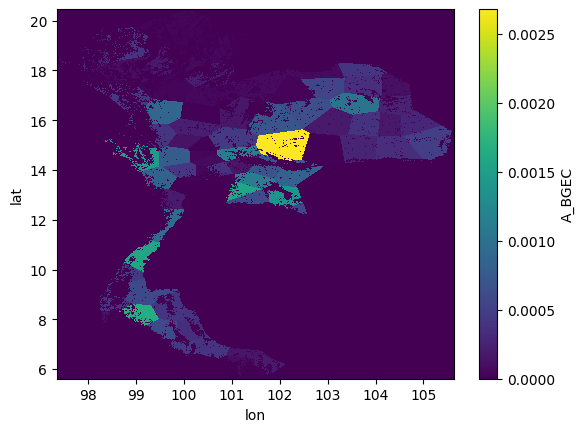

In [23]:
xr_areafeedstock['A_BGEC'].plot()

C:\Users\basna\AppData\Roaming\Python\Python311\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


(101.74962536000004, 15.63262508400004, 103.18446939800003, 17.08820429900004)
<xarray.Dataset>
Dimensions:     (lat: 524, lon: 516)
Coordinates:
  * lat         (lat) float64 15.63 15.64 15.64 15.64 ... 17.08 17.08 17.09
  * lon         (lon) float64 101.8 101.8 101.8 101.8 ... 103.2 103.2 103.2
Data variables: (12/14)
    lccs_class  (lat, lon) uint8 10 10 10 10 10 10 10 ... 10 10 10 10 10 10 10
    SI_BGEC     (lat, lon) int64 0 0 0 0 0 2 2 2 2 2 2 ... 0 0 0 0 0 0 0 0 0 2 2
    SI_Biomass  (lat, lon) int64 0 0 0 0 0 2 2 2 2 2 2 ... 0 0 0 0 0 0 0 0 0 2 2
    SI_Solar    (lat, lon) int64 0 0 0 0 0 2 2 2 2 2 2 ... 0 0 0 0 0 0 0 0 0 2 2
    SI_Wind     (lat, lon) int64 0 0 0 0 0 2 2 2 2 2 2 ... 0 0 0 0 0 0 0 0 0 2 2
    SI_BGWW     (lat, lon) int64 0 0 0 0 0 2 2 2 2 2 2 ... 0 0 0 0 0 0 0 0 0 2 2
    ...          ...
    ADM1_EN     (lat, lon) object 'Chaiyaphum' 'Chaiyaphum' ... 'Udon Thani'
    A_BGEC      (lat, lon) float64 0.0007224 0.0007224 ... 0.0005473 0.0005473
    A_Biomass   (

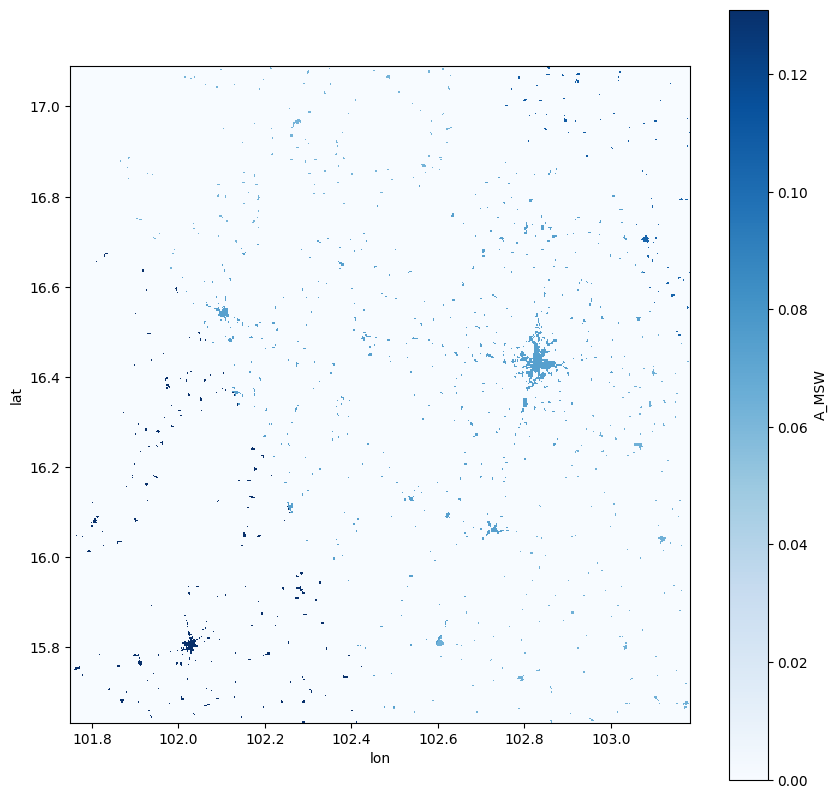

In [24]:
thailandmap = gpd.read_file('Data\\tha_admbnda_adm1_rtsd_20220121\\tha_admbnda_adm1_rtsd_20220121.shp')
thailandmap.crs = {'init': 'epsg:4326'}

province = 'Khon Kaen'
province = thailandmap.loc[thailandmap['ADM1_EN'] == province]
print(province.unary_union.bounds)
min_lon = province.unary_union.bounds[0]
max_lon = province.unary_union.bounds[2]
max_lat = province.unary_union.bounds[3]
min_lat = province.unary_union.bounds[1]

xr_buffer = xr_areafeedstock.sel(lat=slice(min_lat,max_lat), lon=slice(min_lon,max_lon))
print(xr_buffer)

fig, ax = plt.subplots(figsize=(10,10))
province.plot(ax = ax, color='none', edgecolor = 'black', zorder = 0)
xr_buffer['A_MSW'].plot(ax = ax,zorder = 1,cmap="Blues")